In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange
import random
from scipy.spatial.distance import cdist
%matplotlib inline

In [71]:
from sklearn.datasets import make_blobs
# Create Data
data, labels = make_blobs(n_samples=100, n_features=2, 
                           centers=2, cluster_std=2.0, random_state=1)
x1 = data[:,0]
x2 = data[:,1]
#x3 = data[:,2]

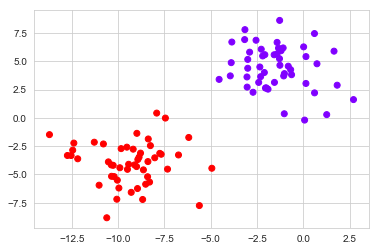

In [72]:
y = labels
sns.set_style("whitegrid")
plt.scatter(x1 , x2, c = labels, cmap='rainbow')

In [73]:
def add_bias(X):
    """
    Describe
    """
    n_samples = X.shape[0]
    bias = np.ones((n_samples, 1))
    return np.concatenate((bias, X), axis=1)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#def cost(h, y):
#    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
def initilize_weights(n_features):
    theta = np.zeros(n_features)
    return theta  
    
    
def fit(X, y, num_iter, lr):
    
    #weights initialization
    n_features = X.shape[1]
    theta = initilize_weights(n_features)

    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        
        #calculate gradient
        gradient = np.dot(X.T, (h - y)) / y.size
        #update weights
        theta -= lr * gradient
    
    return theta       
    
def predict_prob(X):
    lr = 0.1
    num_iter = 1000
    
    X = add_bias(X)
    theta = fit(X,y, num_iter, lr)
    pred = sigmoid(np.dot(X, theta))
  
    pred[pred > 0.5] = 1
    pred[pred <= 0.5] = 0
    
    return theta, pred
    
def predict(X, threshold = 0.5):
    theta, pred = theta, predict_prob(X)
    #predict_prob(X) #>= threshold
    

In [74]:
X = data
y = labels
theta, pred = predict_prob(X)
x2_fit = - theta[0]/theta[2] - theta[1]*x1 /theta[2] #- theta[3]*x3 /theta[2]


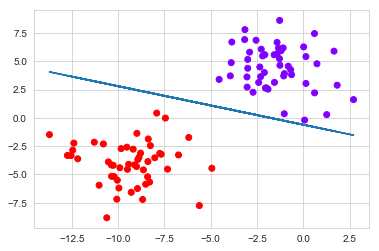

In [75]:
plt.scatter(x1 , x2, c = labels, cmap='rainbow')
plt.plot(x1, x2_fit)

In [66]:
getAccuracy(labels=labels, pred_labels=pred,method="class")

1.0

In [42]:
def getAccuracy(labels, pred_labels, method = "class"):
    """
    Calc Acc given labels and pred_labels
    when method = "class"  - it returns # of correctly predicted labels, normalized to 1 
    when method = "reg"    - it returns 1 - sum((y-y_hat)^2) / sum((y-y_mean)^2)
    ---------------
    
    input:   labels       - actual known labels(values in case of regression)
             pred_labels  - predicted labels(ues in case of regression)
             method       - can be either classification(class-default) or regression(reg) 
    
    output:  accuracy % 
    """

    n = len(labels)
    #-------- check point
    if n != len(pred_labels):
        print("Two vectors must have equal size!")
      
    
    correct = 0.0
    if method == "class":  #just count correct cases 
        for i in range(n):
            if labels[i] == pred_labels[i]:
                correct += 1
        correct = correct/float(n) 
        
    if method == "reg": #return root mean squared error
        ave = np.mean(labels)
        norm = 0.0
        correct = 0.0
        for i in range(n):
            correct = correct + (labels[i] - pred_labels[i])*(labels[i] - pred_labels[i])
            norm = norm + (labels[i] - ave)*(labels[i] - ave)
            
        acc = 1.0 - np.sqrt(correct / norm)    
        correct = acc
        
    return correct
